In [1]:
import numpy as np
import sys
from pathlib import Path

# Make `import src.*` work when running from nested directory
REPO_ROOT = Path.cwd().resolve()
if not (REPO_ROOT / "src").exists() and (REPO_ROOT.parent / "src").exists():
    REPO_ROOT = REPO_ROOT.parent.resolve()

if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))
    
from src import (
    ExperimentConfig,
    load_config,
    list_datasets,
    list_models,
    run_pipeline,
)

# Load a base YAML config from ./config/ (convenience wrapper)
cfg = load_config("fgsm_eps0p02_pca20")
#cfg.data.data_type=""

print("datasets:", list_datasets())
print("models:", list_models())

datasets: ['breast_cancer_tabular', 'cifar10', 'cifar100', 'fashion_mnist', 'geometrical-shapes', 'mnist', 'synthetic_shapes_2class', 'synthetic_shapes_3class', 'two_moons']
models: ['minicnn', 'two_moons_mlp']


(3840, 3)
(960, 3)
(3840,)
(960,)
Epoch [10/20] Train Loss: 0.0381, Train Acc: 99.38%, Val Loss: 0.0425, Val Acc: 99.72%
Epoch [20/20] Train Loss: 0.0098, Train Acc: 99.84%, Val Loss: 0.0049, Val Acc: 100.00%
AUROC: 0.4975086805555556
AUPRC: 0.5059276497564487
FPR@95TPR: 0.9541666666666667


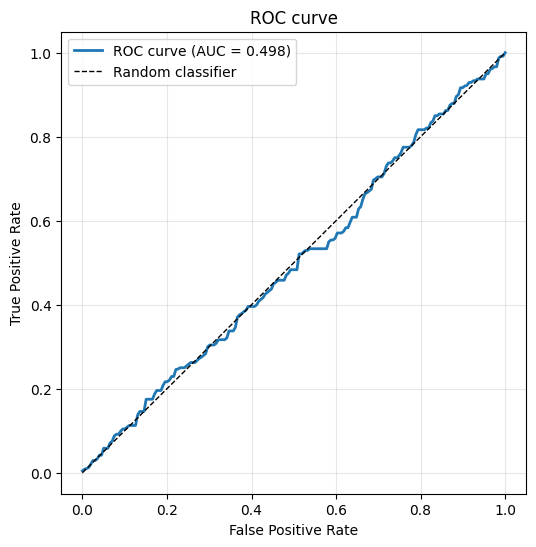

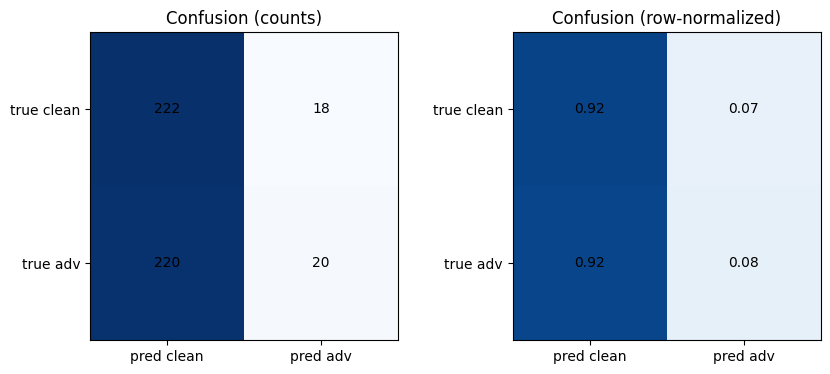

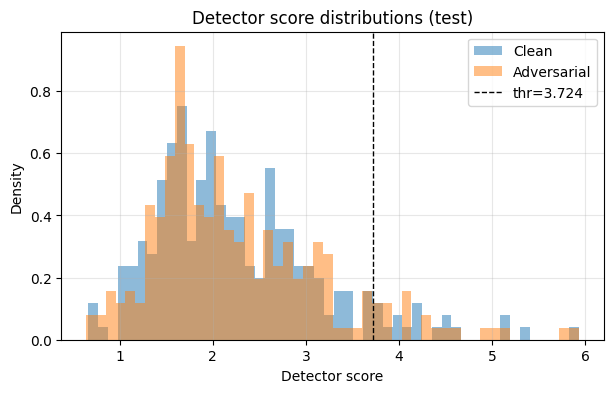

In [2]:
# End-to-end run on a built-in dataset (two moons)
result = run_pipeline(
    dataset_name="geometrical-shapes",
    
    model_name="two_moons_mlp",
    cfg=cfg,
    model_kwargs={"input_dim": 3},
    max_points_for_scoring=400,  # optional: keeps scoring runtime manageable
    seed=cfg.seed,
)

print("AUROC:", result.eval.metrics["roc_auc"])
print("AUPRC:", result.eval.metrics["pr_auc"])
print("FPR@95TPR:", result.eval.metrics["fpr_at_tpr95"])